In [1]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install tabulate
# !pip install prettytable
# !pip install dataframe-image


In [2]:
# import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
# import dataframe_image as dfi
import io



In [3]:
from google.colab import drive

#drive.mount('/content/ds_salaries.csv')

# import data
#df = pd.read_csv(io.StringIO(uploaded['ds_salaries.csv'].decode('utf-8')))
#df
#df = pd.read_csv("ds_salaries.csv")


In [4]:
#from google.colab import drive
#drive.mount('/content/drive')


ds_df = pd.read_csv('/content/ds_salaries.csv')
ai_df = pd.read_csv('/content/ai_salaries.csv')

df = pd.concat([ai_df,ds_df])

In [5]:
#df = pd.read_csv('ds_salaries.csv')

df.shape

(14732, 11)

In [6]:
df_us_ft_only = df[
    (df['company_location'].str.lower().str.contains('us')) &
    (df['employee_residence'].str.lower().str.contains('us')) &
    (df['employment_type'].str.lower() == 'ft')
]

In [7]:
df_us_ft_only.shape

(12376, 11)

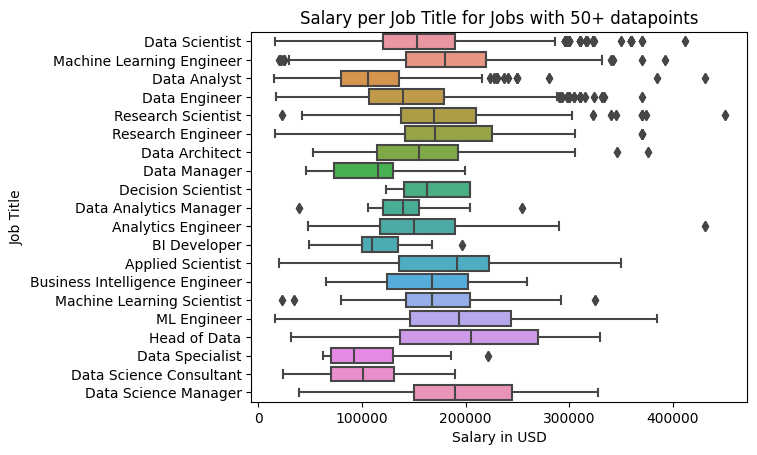

In [8]:
#Filter is set to Jobs with more than 10 entries
df2 = df.groupby(["job_title"]).filter(lambda x: len(x)> 50)
sea.boxplot(y=df2["job_title"], x=df2["salary_in_usd"]).set_title("Salary per Job Title for Jobs with 50+ datapoints")
plt.xlabel("Salary in USD")
plt.ylabel("Job Title")
#plt.tight_layout()
#plt.savefig("photos/10+JobsWithSalary.jpg")
plt.show()

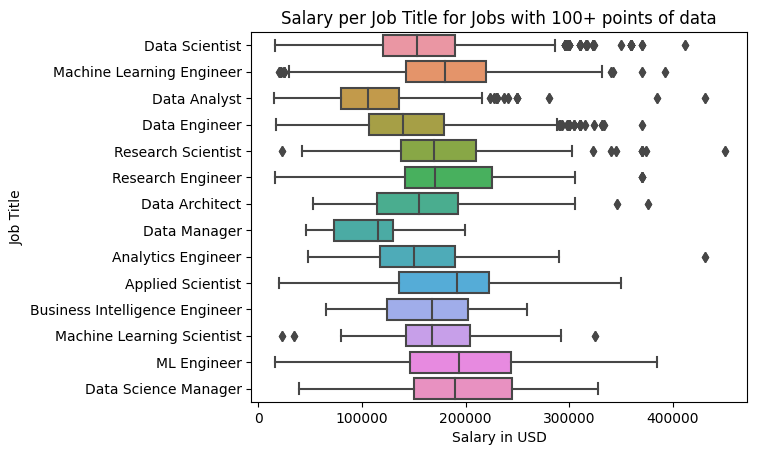

In [9]:
#Filter is set to Jobs with more than 25 entries
df2 = df.groupby(["job_title"]).filter(lambda x: len(x)> 100)
sea.boxplot(y=df2["job_title"], x=df2["salary_in_usd"]).set_title("Salary per Job Title for Jobs with 100+ points of data")
plt.xlabel("Salary in USD")
plt.ylabel("Job Title")
#plt.tight_layout()
#plt.savefig("photos/25+JobsWithSalary.jpg")
plt.show()

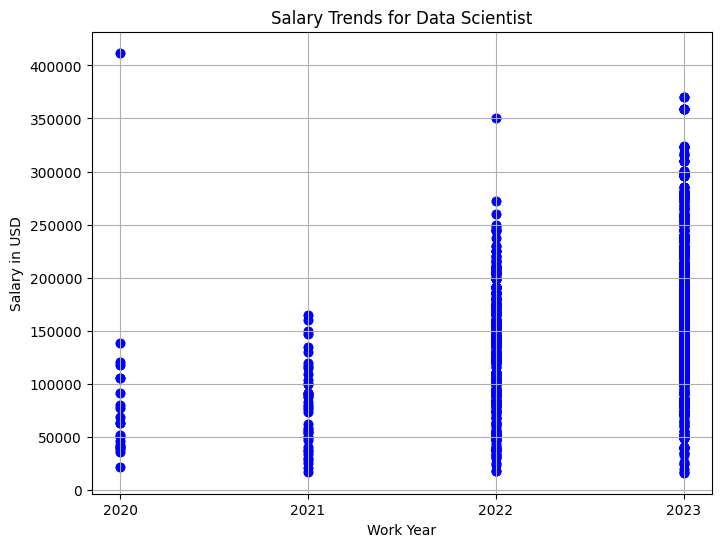

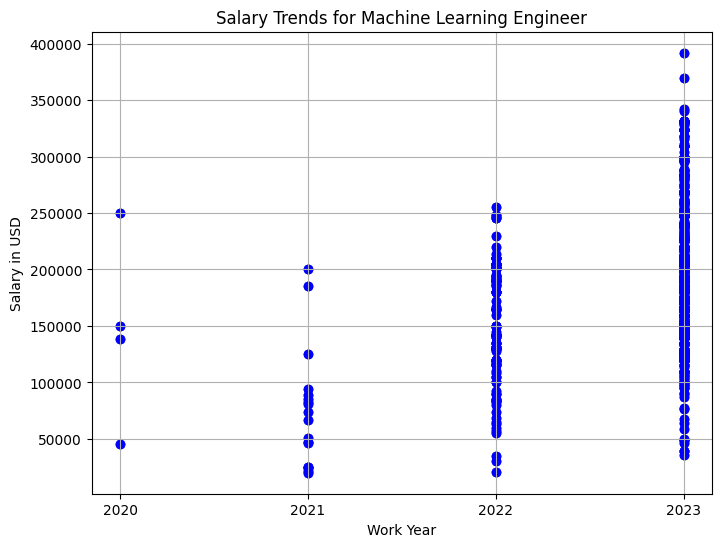

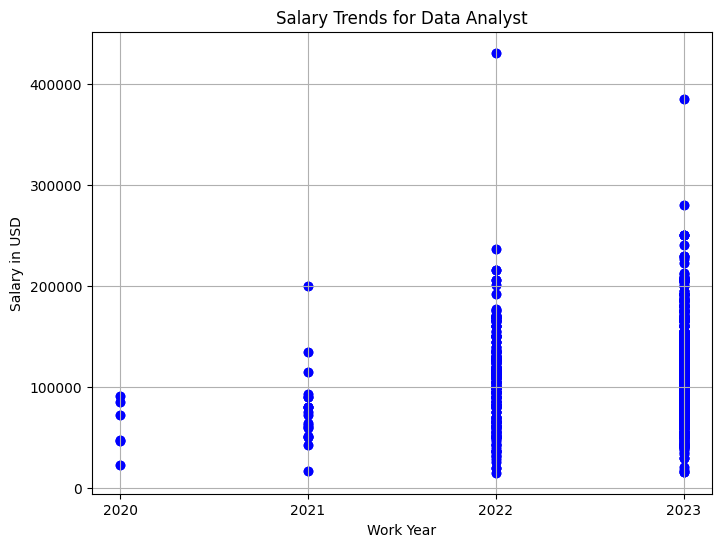

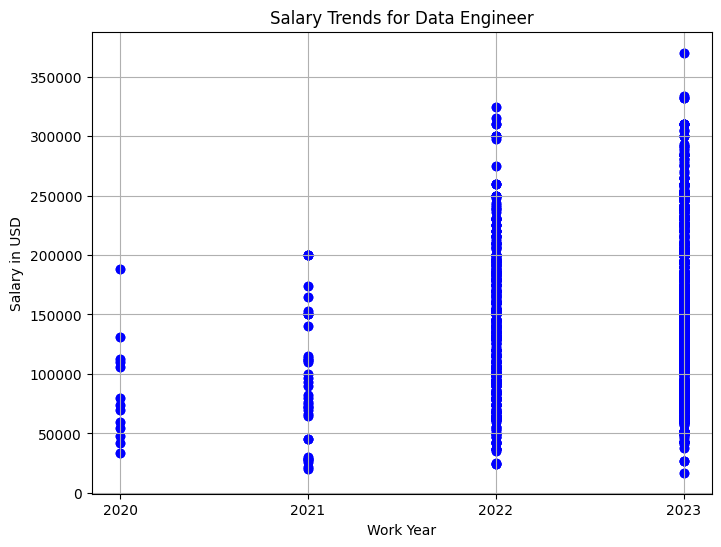

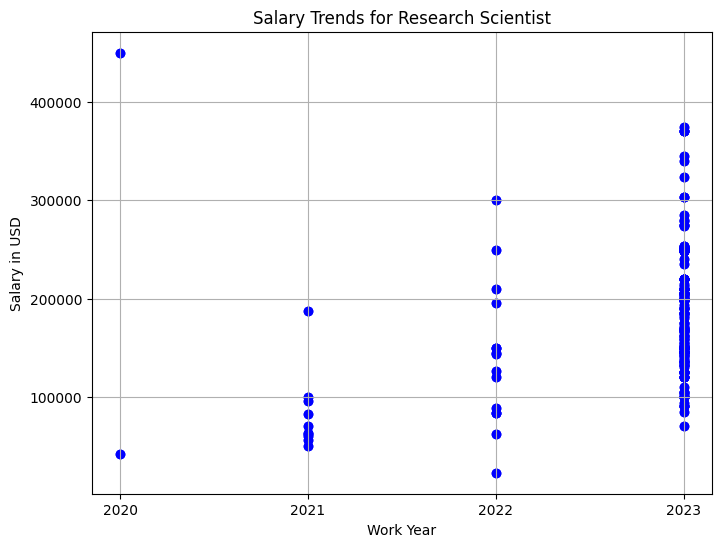

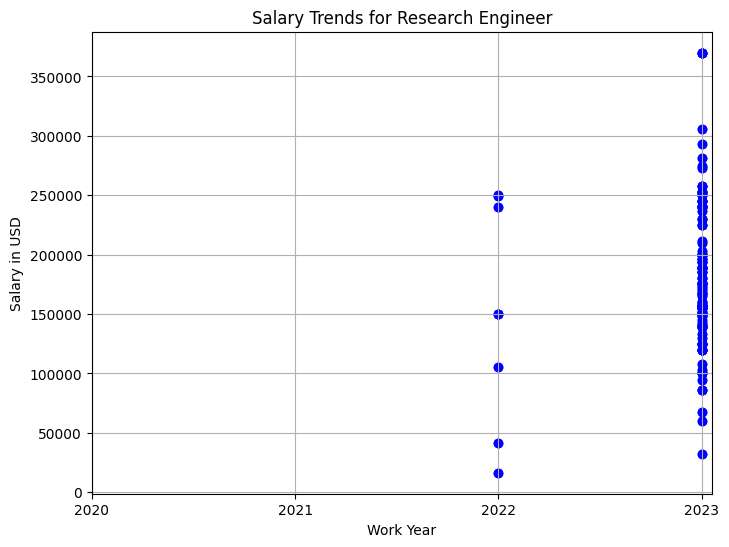

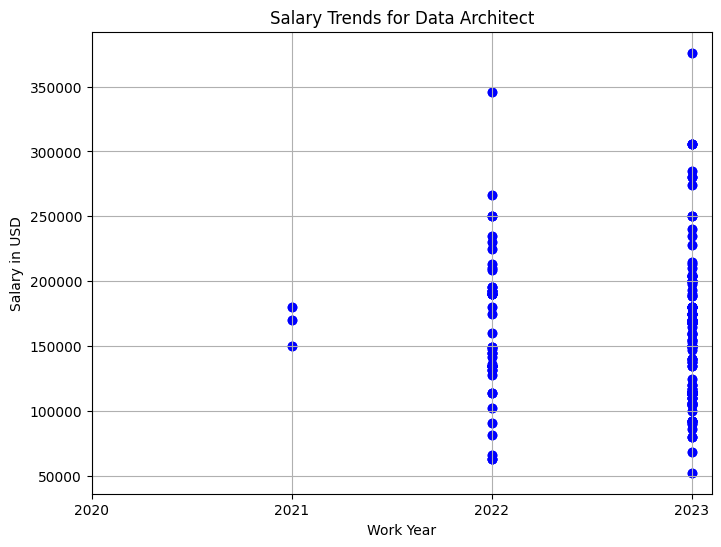

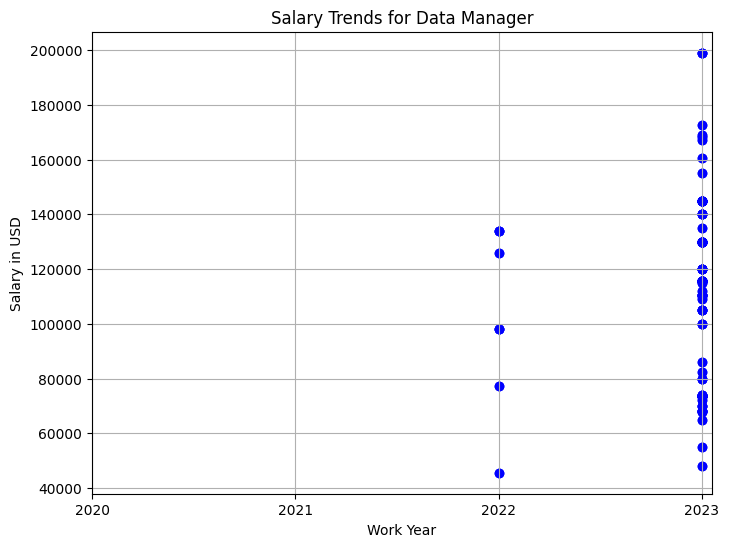

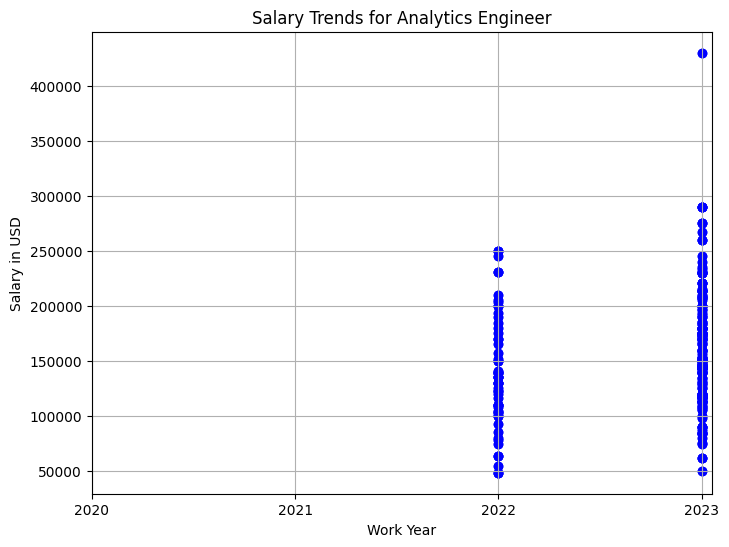

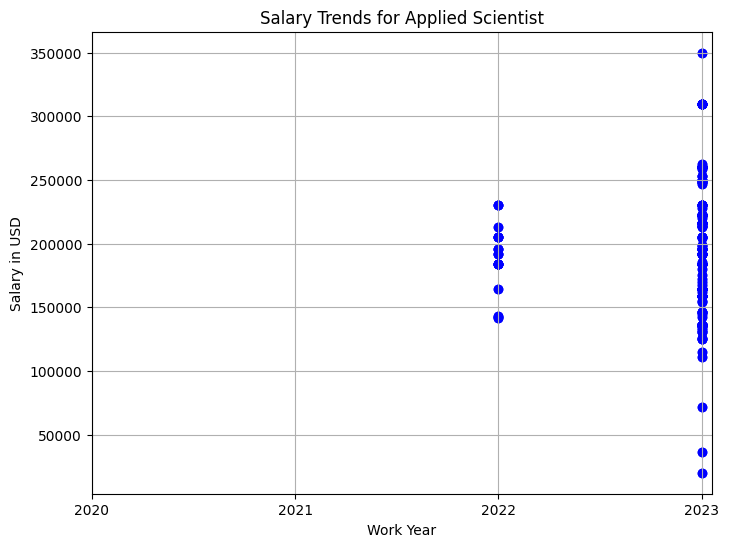

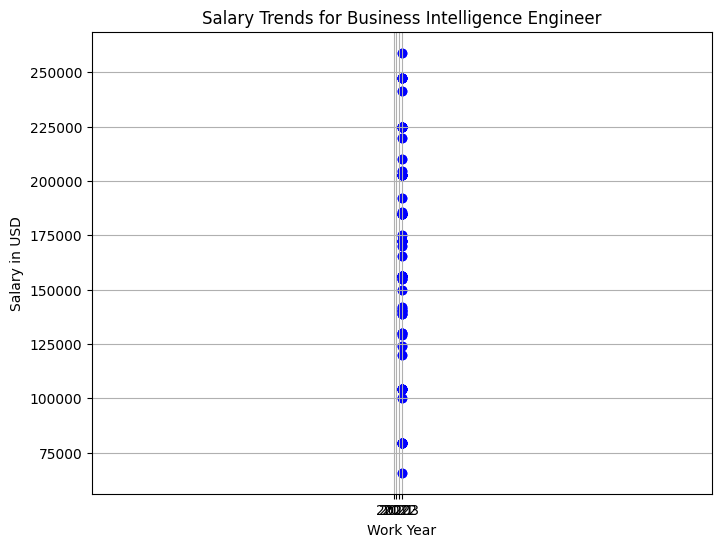

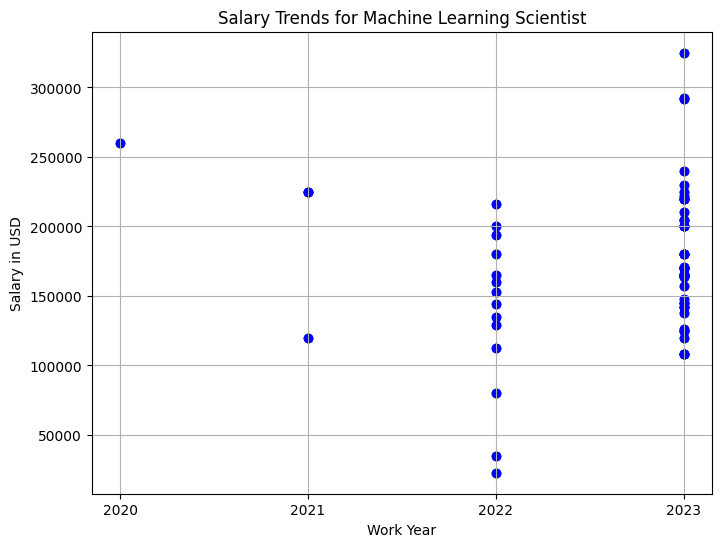

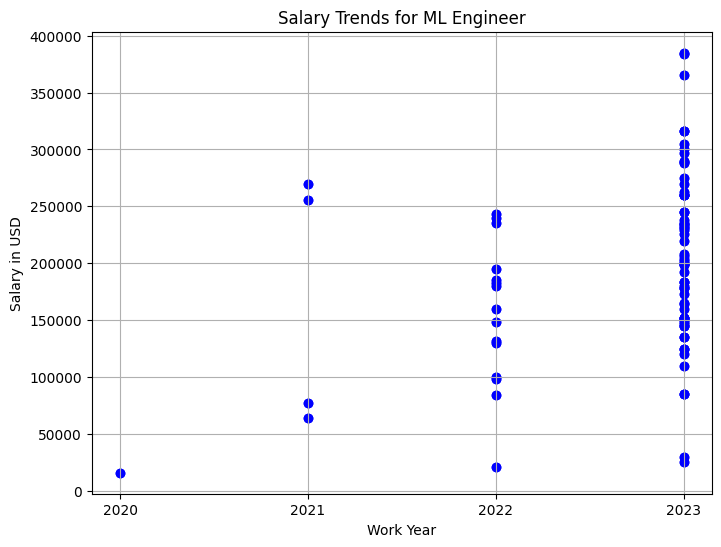

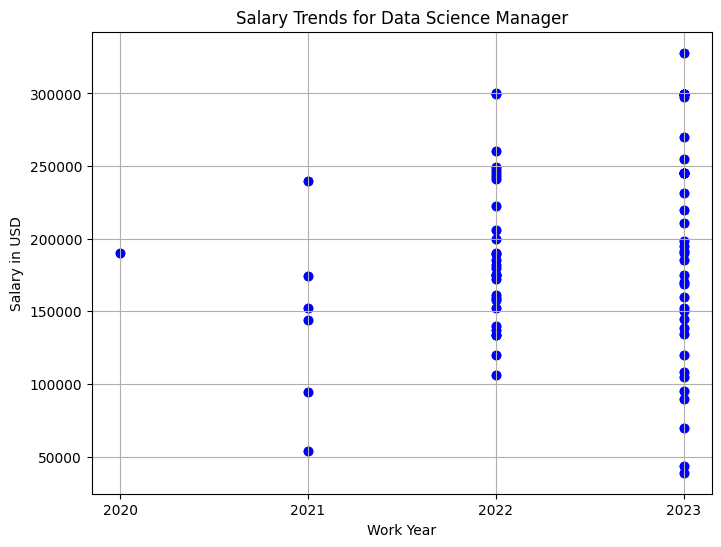

In [10]:
df3 = df2

# Plotting individual dot plots for each title
unique_titles = df3['job_title'].unique()

for title in unique_titles:
    title_data = df3[df3['job_title'] == title]

    plt.figure(figsize=(8, 6))
    plt.scatter(title_data['work_year'], title_data['salary_in_usd'], label=title, marker='o', color='blue')
    plt.title(f'Salary Trends for {title}')
    plt.xlabel('Work Year')
    plt.ylabel('Salary in USD')
    plt.xticks(np.arange(2020, 2024,1))
    #plt.legend()
    plt.grid(True)
    plt.show()

# New Section

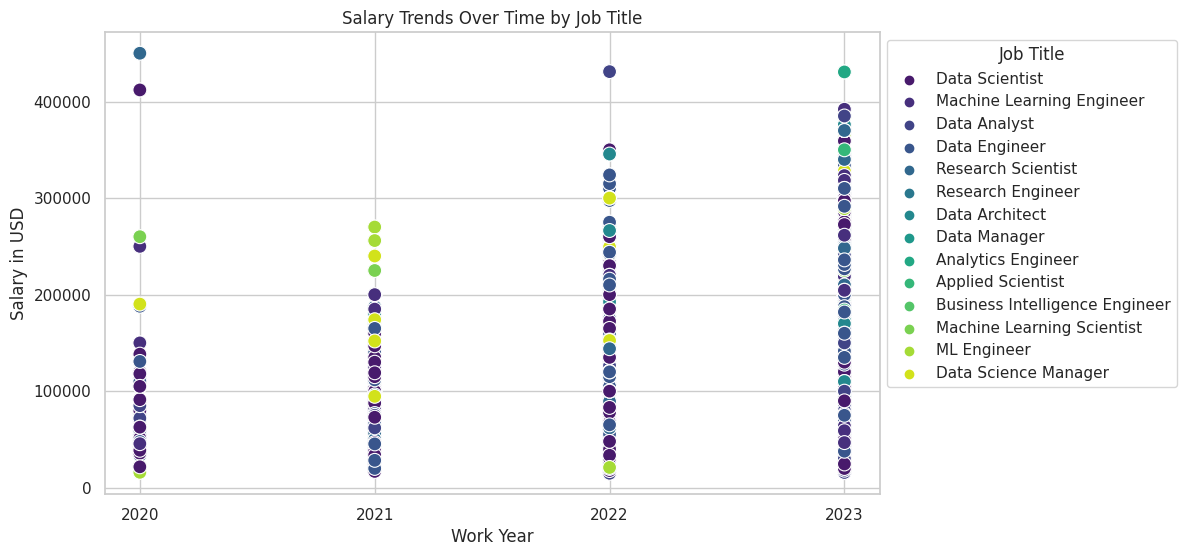

In [11]:
# plot all data on the same chart for hollistic view
import seaborn as sns

sns.set(style="whitegrid")

# Plotting individual dot plots for each title
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x='work_year', y='salary_in_usd', hue='job_title', palette='viridis', s=100)
plt.title('Salary Trends Over Time by Job Title')
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.legend(title='Job Title', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(np.arange(2020, 2024,1))
plt.show()

#plt.savefig('photos/ComprehensiveSalaryPlot.jpg')

In [12]:
from tabulate import tabulate
yearly_stats = df3.groupby('work_year')['salary_in_usd'].agg(['mean', 'median', 'std']).reset_index().round(2)
print("Statistics of all jobs per Year:")
print(tabulate(yearly_stats, headers='keys', tablefmt='pretty'))

# Calculate mean, median, and standard deviation for each job title
job_title_stats = df3.groupby('job_title')['salary_in_usd'].agg(['mean', 'median', 'std']).reset_index().round(2)

print("\nStatistics per Job Title:")
print(tabulate(job_title_stats, headers='keys', tablefmt='pretty'))

Statistics of all jobs per Year:
+---+-----------+-----------+----------+----------+
|   | work_year |   mean    |  median  |   std    |
+---+-----------+-----------+----------+----------+
| 0 |  2020.0   | 98398.98  | 72000.0  | 87403.44 |
| 1 |  2021.0   | 92747.18  | 80000.0  | 54864.67 |
| 2 |  2022.0   | 136516.37 | 135000.0 | 55532.03 |
| 3 |  2023.0   | 157757.45 | 150000.0 | 61972.74 |
+---+-----------+-----------+----------+----------+

Statistics per Job Title:
+----+--------------------------------+-----------+----------+----------+
|    |           job_title            |   mean    |  median  |   std    |
+----+--------------------------------+-----------+----------+----------+
| 0  |       Analytics Engineer       | 156447.11 | 150000.0 | 55373.59 |
| 1  |       Applied Scientist        | 190237.91 | 192000.0 | 52047.08 |
| 2  | Business Intelligence Engineer | 161771.67 | 167800.0 | 51336.18 |
| 3  |          Data Analyst          | 110437.04 | 106020.0 | 43480.72 |
| 4  |

In [13]:
# Calculate mean and median for each year
yearly_stats = df3.groupby('work_year')['salary_in_usd'].agg(['count','mean', 'median'])

# Calculate YoY change in mean and median
yearly_stats['mean_change'] = yearly_stats['mean'].pct_change() * 100
yearly_stats['median_change'] = yearly_stats['median'].pct_change() * 100

# Drop the first row (NaN values after calculating percentage change)
yearly_stats = yearly_stats.reset_index().dropna().reset_index().round(2)

# Print YoY changes
print(tabulate(yearly_stats, headers='keys', tablefmt='pretty', showindex=False))


+-------+-----------+--------+-----------+----------+-------------+---------------+
| index | work_year | count  |   mean    |  median  | mean_change | median_change |
+-------+-----------+--------+-----------+----------+-------------+---------------+
|  1.0  |  2021.0   | 282.0  | 92747.18  | 80000.0  |    -5.74    |     11.11     |
|  2.0  |  2022.0   | 2962.0 | 136516.37 | 135000.0 |    47.19    |     68.75     |
|  3.0  |  2023.0   | 9610.0 | 157757.45 | 150000.0 |    15.56    |     11.11     |
+-------+-----------+--------+-----------+----------+-------------+---------------+


In [14]:
#Remote Ratio statistics per employee residence- Work in Progress
df2 = df.groupby(['company_size','remote_ratio']).count()
df2

work_year  experience_level  employment_type  \
company_size remote_ratio                                                 
L            0                   556               556              556   
             50                  258               258              258   
             100                 514               514              514   
M            0                  7910              7910             7910   
             50                   98                98               98   
             100                5066              5066             5066   
S            0                    60                60               60   
             50                   72                72               72   
             100                 198               198              198   

                           job_title  salary  salary_currency  salary_in_usd  \
company_size remote_ratio                                                      
L            0                   556     556              556            556   
             50                  258     258              258            258   
             100                 514     514              514            514   
M            0                  7910    7910             7910           7910   
             50                   98      98               98             98   
             100                5066    5066             5066           5066   
S            0                    60      60               60             60   
             50                   72      72               72             72   
             100                 198     198              198            198   

                           employee_residence  company_location  
company_size remote_ratio                                        
L            0                            556               556  
             50                           258               258  
             100                          514               514  
M            0                           7910              7910  
             50                            98                98  
             100                         5066              5066  
S            0                             60                60  
             50                            72                72  
             100                          198               198

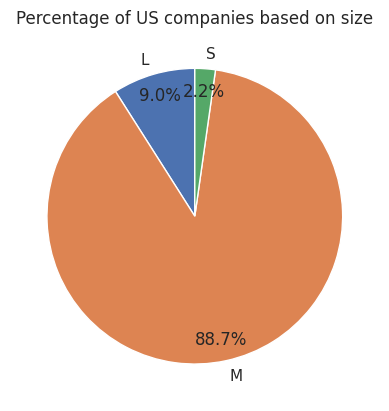

In [68]:
grouped_data = df.groupby('company_size')['remote_ratio'].count()

# Plotting the pie chart
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=90,pctdistance=.85)
plt.title('Percentage of US companies based on size')
plt.show()

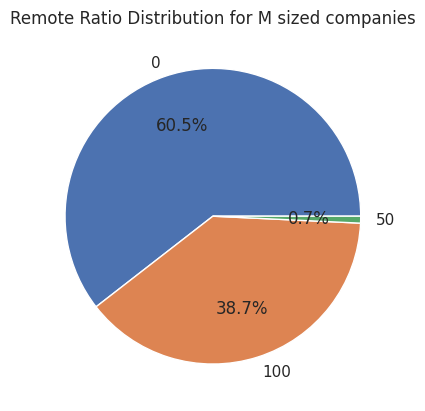

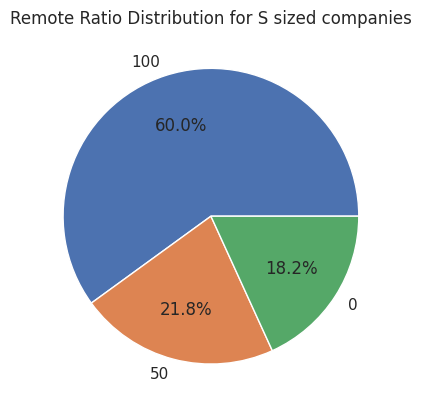

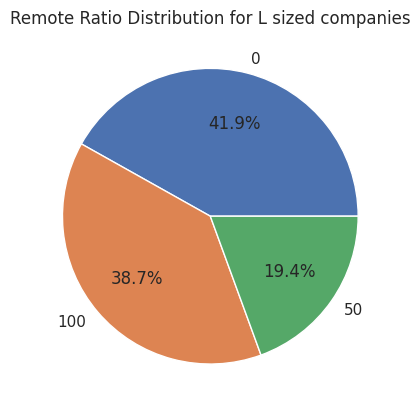

In [70]:

# Iterate over unique company sizes and plot a bar graph for each
for company_size in df['company_size'].unique():
    subset_df = df[df['company_size'] == company_size]
    count_data = subset_df['remote_ratio'].value_counts()

    # Plotting the bar graph
    count_data.plot(kind='pie', autopct='%1.1f%%', pctdistance=.65)
    plt.title(f'Remote Ratio Distribution for {company_size} sized companies')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

In [74]:
# Calculate mean and median for each year
yearly_stats = df3.groupby('work_year')['remote_ratio'].agg(['count','mean', 'median']).reset_index().round(2)

# Calculate YoY change in mean and median
yearly_stats['mean_change'] = yearly_stats['mean'].pct_change() * 100
yearly_stats['median_change'] = yearly_stats['median'].pct_change() * 100

# Drop the first row (NaN values after calculating percentage change)
yearly_stats = yearly_stats.reset_index().dropna().round(2)


# Print YoY changes
print(tabulate(yearly_stats, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+--------+-------+--------+-------------+---------------+
| index | work_year | count  | mean  | median | mean_change | median_change |
+-------+-----------+--------+-------+--------+-------------+---------------+
|  1.0  |  2021.0   | 282.0  | 71.28 | 100.0  |    10.87    |     100.0     |
|  2.0  |  2022.0   | 2962.0 | 53.41 | 100.0  |   -25.07    |      0.0      |
|  3.0  |  2023.0   | 9610.0 | 34.59 |  0.0   |   -35.24    |    -100.0     |
+-------+-----------+--------+-------+--------+-------------+---------------+


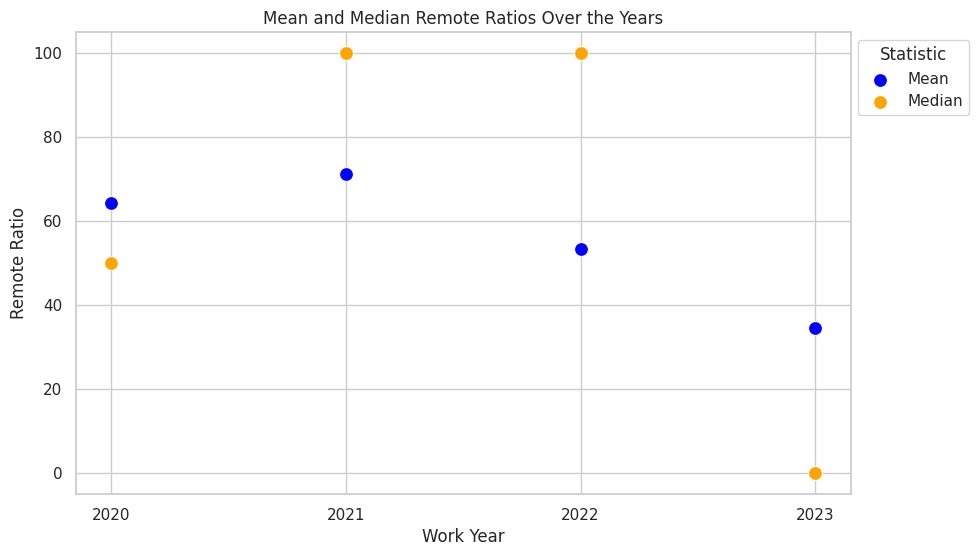

In [43]:
# Calculate mean and median for each year
yearly_stats = df3.groupby('work_year')['remote_ratio'].agg(['mean', 'median'])

# Reset the index to use 'work_year' as a column for Seaborn
yearly_stats.reset_index(inplace=True)

# Set Seaborn style
sns.set(style="whitegrid")

# Plotting mean and median for each year
plt.figure(figsize=(10, 6))
sns.scatterplot(data=yearly_stats, x='work_year', y='mean', label='Mean', color='blue', s=100)
sns.scatterplot(data=yearly_stats, x='work_year', y='median', label='Median', color='orange', s=100)
plt.title('Mean and Median Remote Ratios Over the Years')
plt.xlabel('Work Year')
plt.ylabel('Remote Ratio')
plt.xticks(np.arange(2020,2024,1))
plt.legend(title='Statistic', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()
#plt.savefig('photos/RemoteRatioStatOverYears.jpg')

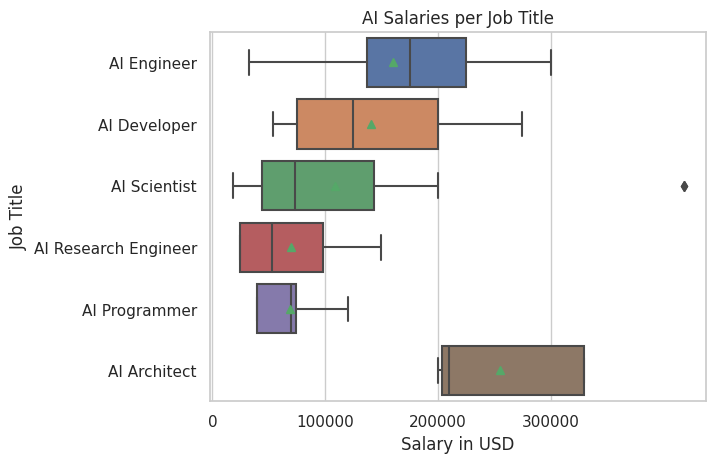

In [42]:
#Salaries for Artifical Intelligence based roles
df2 =df[df['job_title'].str.match('^AI')]
sea.boxplot(y=df2["job_title"], x=df2["salary_in_usd"], showmeans = True).set_title("AI Salaries per Job Title")
#.groupby(["job_title"])
plt.xlabel("Salary in USD")
plt.ylabel("Job Title")
plt.xticks(np.arange(0, 400000,100000))
#plt.savefig('photos/AISalariesperJobTitle.jpg')
plt.show()

([<matplotlib.axis.XTick at 0x7f69fdc65b40>,
 [Text(0, 0, '0'),
  Text(100000, 0, '100000'),
  Text(200000, 0, '200000'),
  Text(300000, 0, '300000')])

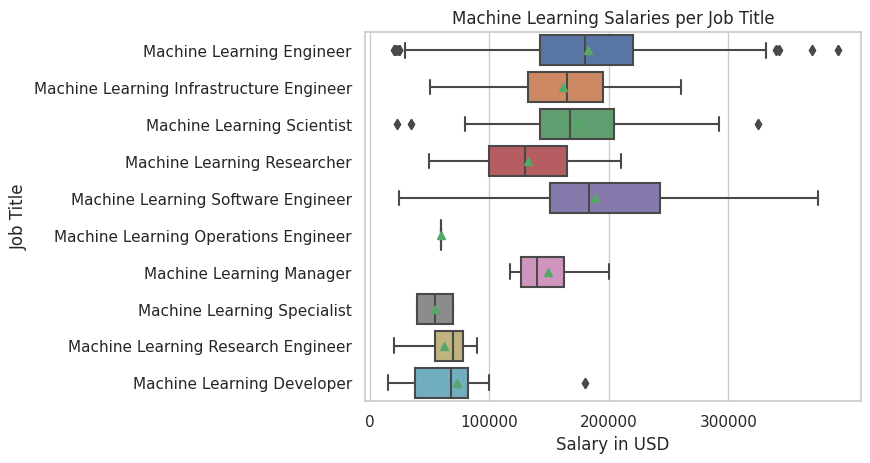

In [79]:
#Salaries for Machine Learning based roles
df2 =df[df['job_title'].str.match('^Machine')> 0]
sea.boxplot(y=df2["job_title"], x=df2["salary_in_usd"], showmeans = True).set_title("Machine Learning Salaries per Job Title")
#.groupby(["job_title"])
plt.xlabel("Salary in USD")
plt.ylabel("Job Title")
plt.xticks(np.arange(0, 400000,100000))
#plt.savefig('photos/MachineLearningSalariesBoxPlot.jpg')
#plt.show()

Text(0, 0.5, 'Job Title')

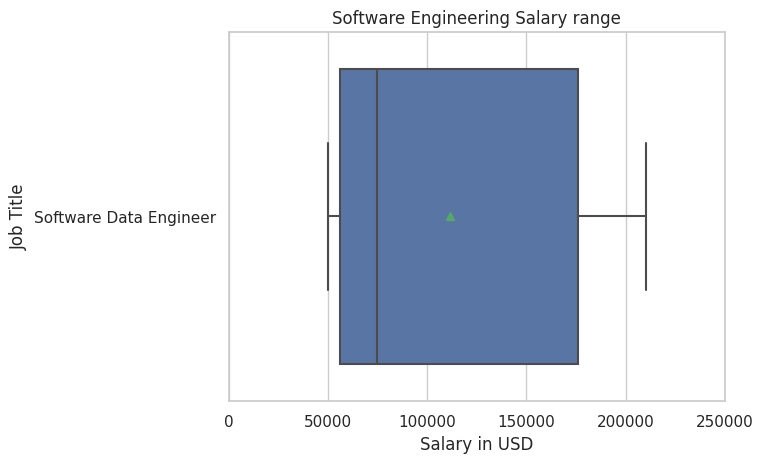

In [78]:
#Salaries for Software Engineering based roles
df2 =df[df['job_title'].str.match('^Software')]
sea.boxplot(y=df2["job_title"], x=df2["salary_in_usd"], showmeans = True).set_title("Software Engineering Salary range")
#.groupby(["job_title"])
plt.xlabel("Salary in USD")
plt.xticks(np.arange(0, 275000,50000))
plt.ylabel("Job Title")
#plt.show()

In [22]:
df.groupby('job_title').describe()
#df.describe(include='all').loc['mean']
df2 =df[df['job_title'].str.match('^AI')].groupby('job_title').describe()
del df2['work_year']
del df2['salary']
del df2 ['remote_ratio']
df2
#df2.dfi.export('photos/AISalaryStatisticsPerJob.png')

salary_in_usd                                         \
                             count           mean           std       min   
job_title                                                                   
AI Architect                  20.0  255193.600000  62790.060633  200000.0   
AI Developer                  28.0  141041.714286  73786.959422   53984.0   
AI Engineer                   26.0  160549.384615  78832.099288   32811.0   
AI Programmer                 10.0   68817.400000  30946.946915   40000.0   
AI Research Engineer           8.0   70117.000000  55142.420704   24322.0   
AI Scientist                  40.0  108644.650000  95701.126149   18053.0   

                                                              
                           25%       50%       75%       max  
job_title                                                     
AI Architect          204000.0  209968.0  330000.0  330000.0  
AI Developer           74883.0  125000.0  200000.0  275000.0  
AI Engineer           136800.0  175000.0  225000.0  300000.0  
AI Programmer          40000.0   70000.0   74087.0  120000.0  
AI Research Engineer   24785.5   53073.0   98404.5  150000.0  
AI Scientist           44139.0   73309.5  143750.0  417937.0

In [23]:
df.groupby('job_title').describe()
#df.describe(include='all').loc['mean']
df2 =df[df['job_title'].str.match('^Machine')].groupby('job_title').describe()
del df2['work_year']
del df2['salary']
del df2 ['remote_ratio']
df2
#df2.dfi.export('photos/machineLearningSalaryStatisticsPerJob.png')

salary_in_usd                 \
                                                 count           mean   
job_title                                                               
Machine Learning Developer                        16.0   72703.500000   
Machine Learning Engineer                       1486.0  182556.582773   
Machine Learning Infrastructure Engineer          50.0  161878.000000   
Machine Learning Manager                           8.0  149166.500000   
Machine Learning Operations Engineer               2.0   60000.000000   
Machine Learning Research Engineer                 8.0   62504.000000   
Machine Learning Researcher                       22.0  132294.181818   
Machine Learning Scientist                       124.0  172272.322581   
Machine Learning Software Engineer                30.0  188440.266667   
Machine Learning Specialist                        4.0   55000.000000   

                                                                            \
                                                   std       min       25%   
job_title                                                                    
Machine Learning Developer                49569.331774   15000.0   38250.0   
Machine Learning Engineer                 62825.215248   20000.0  142200.0   
Machine Learning Infrastructure Engineer  52082.028816   50180.0  132400.0   
Machine Learning Manager                  33793.827716  117104.0  126447.5   
Machine Learning Operations Engineer          0.000000   60000.0   60000.0   
Machine Learning Research Engineer        27797.038773   20000.0   54644.0   
Machine Learning Researcher               45831.326076   50000.0  100000.0   
Machine Learning Scientist                54484.711092   22800.0  142200.0   
Machine Learning Software Engineer        92363.105221   24322.0  150750.0   
Machine Learning Specialist               17320.508076   40000.0   40000.0   

                                                                        
                                               50%       75%       max  
job_title                                                               
Machine Learning Developer                 68407.0   82610.5  180000.0  
Machine Learning Engineer                 180000.0  219825.0  392000.0  
Machine Learning Infrastructure Engineer  165400.0  195000.0  260000.0  
Machine Learning Manager                  139781.0  162500.0  200000.0  
Machine Learning Operations Engineer       60000.0   60000.0   60000.0  
Machine Learning Research Engineer         70008.0   77868.0   90000.0  
Machine Learning Researcher               130000.0  165000.0  210000.0  
Machine Learning Scientist                167875.0  204500.0  325000.0  
Machine Learning Software Engineer        183600.0  243100.0  375000.0  
Machine Learning Specialist                55000.0   70000.0   70000.0

In [24]:
pd.set_option('display.max_rows',None)
pd.options.display.float_format = "{:,.2f}".format
df2 = df[['job_title','salary_in_usd']].groupby('job_title').describe()
df2
#df2.dfi.export('photos/salaryStatisticsPerJob.png')

salary_in_usd                        \
                                                 count       mean        std   
job_title                                                                      
AI Architect                                     20.00 255,193.60  62,790.06   
AI Developer                                     28.00 141,041.71  73,786.96   
AI Engineer                                      26.00 160,549.38  78,832.10   
AI Programmer                                    10.00  68,817.40  30,946.95   
AI Research Engineer                              8.00  70,117.00  55,142.42   
AI Scientist                                     40.00 108,644.65  95,701.13   
AWS Data Architect                                2.00 258,000.00       0.00   
Analytics Engineer                              408.00 156,447.11  55,373.59   
Analytics Engineering Manager                     2.00 399,880.00       0.00   
Applied Data Scientist                           24.00 102,587.92  97,675.83   
Applied Machine Learning Engineer                 6.00 141,726.33  69,831.31   
Applied Machine Learning Scientist               28.00 104,289.57  99,317.86   
Applied Scientist                               416.00 190,237.91  52,047.08   
Autonomous Vehicle Technician                     4.00  82,777.50  42,980.84   
Azure Data Engineer                               4.00 100,000.00       0.00   
BI Analyst                                       42.00 118,920.05  48,322.90   
BI Data Analyst                                  32.00  71,778.19  28,837.82   
BI Data Engineer                                  2.00  60,000.00       0.00   
BI Developer                                     80.00 116,936.75  31,387.44   
Big Data Architect                                4.00 126,751.00  31,232.34   
Big Data Engineer                                20.00  74,980.60  49,791.56   
Business Data Analyst                            38.00  72,155.11  46,776.80   
Business Intelligence Analyst                    48.00 137,768.04  37,864.42   
Business Intelligence Data Analyst                4.00  83,209.50  18,233.30   
Business Intelligence Developer                  30.00 110,069.00  43,936.86   
Business Intelligence Engineer                  180.00 161,771.67  51,336.18   
Cloud Data Architect                              2.00 250,000.00       0.00   
Cloud Data Engineer                               8.00 131,617.75  40,256.96   
Cloud Database Engineer                          10.00 155,000.00  27,080.13   
Compliance Data Analyst                           4.00  45,000.00  17,320.51   
Computer Vision Engineer                         48.00 158,819.42  92,689.16   
Computer Vision Software Engineer                10.00  77,760.60  46,216.38   
Consultant Data Engineer                          2.00 118,539.00       0.00   
Data Analyst                                  2,224.00 110,437.04  43,480.72   
Data Analytics Consultant                         4.00  81,500.00  36,373.07   
Data Analytics Engineer                          10.00  78,839.40  43,253.54   
Data Analytics Lead                               8.00 162,533.75 155,599.68   
Data Analytics Manager                           74.00 143,882.57  34,675.04   
Data Analytics Specialist                         4.00  95,000.00  11,547.01   
Data Architect                                  322.00 161,740.83  56,972.41   
Data DevOps Engineer                              2.00  53,984.00       0.00   
Data Developer                                   12.00 103,738.17  30,647.16   
Data Engineer                                 3,524.00 145,862.80  56,880.40   
Data Infrastructure Engineer                     24.00 201,375.42  69,438.15   
Data Integration Specialist                      14.00  78,911.86  29,416.51   
Data Lead                                        16.00 161,625.00  93,906.25   
Data Management Specialist                        6.00 105,931.00  32,000.33   
Data Manager                             

In [25]:
# removing rows randomly
for i in range(5):
    df_subset = df2.sample(n=20)
    #df_subset.dfi.export(f"photos/salaryStatisticsPerJob{i+1}.png")